# SOK-1006 V25
## Arbeidskrav 6 - Detaljhandel i Norge: Estimering av en produktfunksjon

Tilpasset fra mappeoppgave 2 v24.



### 1. Bakgrunn

Detaljhandel beskriver salg av varer til individer eller husholdninger. Her er en overskrift fra [Dagens Næringsliv, 27. mars 2024](https://www.dn.no/handel/ssb/shopping/marginal-oppgang-for-detaljhandelen/2-1-1618069)            


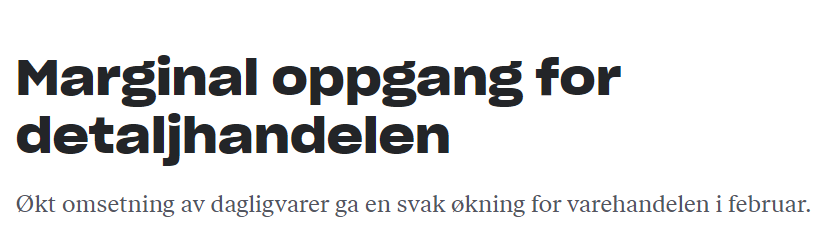

Her nevnes både varehandelen, detaljhandelen og dagligvarer i samme sak. For å vite hvordan disse begrepene henger sammen må man vite noe om [Næringsgruppering](https://www.ssb.no/klass/klassifikasjoner/6/koder). Denne lenken fører til Næringsgrupperingen som brukes i Norge (SN2007). I kategori G finner man "Varehandel, reparasjon av motorvogner", og dersom du utvider gruppe G får man 3 nye undergrupper. Vi er interessert i undergruppe 47 - Detaljhandel, unntatt med motorvogner. Dersom du klikker på plusstegnet ved siden av tallet 47 får du opp nye undergrupper, og laveste gruppe beskrives med fem siffer. Ved å trykke på "i" ikonet kan du få informasjon om hva hver gruppe inneholder.       

I denne oppgaven skal vi estimere en produktfunksjon for detaljhandelen.





### Oppgave 1 - Kartlegging av detaljhandel i Norge

Hva menes med varehandel og detaljhandel?      

#### Varehandel er en fellesbetegnelse for all handel med goder, uansett hvem partene er. Detaljhandel er handelen spesefikt mellom enkelte husholdniger og bedrifer. 

### Oppgave 2 - Produktfunksjon for detaljhandel

I denne oppgaven skal du estimere en produktfunksjon for detaljhandel i Norge. Vi antar at produktfunksjonen tar Cobb-Douglas form:

\begin{equation}
   x = ZN^aK^{b}\;\;(1)
\end{equation}


hvor $x$ er enheter ferdigprodukt, $N$ er enheter arbeidskraft, $K$ er enheter kapital og $Z>0, a>0, b>0$ er konstante tall.



[Tabell 12910, SSB](https://www.ssb.no/statbank/table/12910/) inneholder data etter næring på blant annet Produksjonsverdi, Lønnskostnader og Bruttoinvesteringer (alle i mill NOK). Følgende kode kan brukes for å laste ned disse dataene for detaljhandel for 2022.

In [15]:
# last inn pakker

import json
import pandas as pd
import requests
from pyjstat import pyjstat

# Lim in PostUrl som spørringen skal postes mot
postUrl = "https://data.ssb.no/api/v0/no/table/12910/"

# spørring fra SSB

apiQuery = {
  "query": [
    {
      "code": "NACE2007",
      "selection": {
        "filter": "vs:NACE2007StrNaringUndGr",
        "values": [
          "47.111",
          "47.112",
          "47.190",
          "47.210",
          "47.220",
          "47.230",
          "47.241",
          "47.242",
          "47.251",
          "47.259",
          "47.260",
          "47.291",
          "47.292",
          "47.299",
          "47.300",
          "47.410",
          "47.420",
          "47.430",
          "47.510",
          "47.521",
          "47.522",
          "47.523",
          "47.524",
          "47.529",
          "47.531",
          "47.532",
          "47.533",
          "47.540",
          "47.591",
          "47.592",
          "47.593",
          "47.594",
          "47.599",
          "47.610",
          "47.620",
          "47.630",
          "47.641",
          "47.642",
          "47.650",
          "47.710",
          "47.721",
          "47.722",
          "47.730",
          "47.740",
          "47.750",
          "47.761",
          "47.762",
          "47.771",
          "47.772",
          "47.781",
          "47.782",
          "47.789",
          "47.791",
          "47.792",
          "47.799",
          "47.810",
          "47.820",
          "47.890",
          "47.911",
          "47.912",
          "47.913",
          "47.914",
          "47.915",
          "47.916",
          "47.917",
          "47.919",
          "47.990"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "Produksjonsverdi",
          "Lonnskost",
          "BruttoInvesteringer"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


# Funksjon for å konvertere uttrekket til 2 dataframes, tar 2 paramtre (SSB)

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds


df, df_id, ds = apiToDataframe(postUrl, apiQuery)

df

,næring (SN2007),foretak/bedrift,statistikkvariabel,år,value
0,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Produksjonsverdi (mill. kr),2022,52149.6
1,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,22215.3
2,Butikkhandel med bredt vareutvalg med hovedvek...,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,3807.0
3,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,49435.7
4,Butikkhandel med bredt vareutvalg med hovedvek...,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,21116.2
...,...,...,...,...,...
397,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Lønnskostnader (mill. kr),2022,532.4
398,Detaljhandel utenom utsalgssted ellers,Foretak (hovedenheter),Bruttoinvesteringer (mill. kr),2022,83.3
399,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Produksjonsverdi (mill. kr),2022,1611.6
400,Detaljhandel utenom utsalgssted ellers,Bedrifter (underenheter),Lønnskostnader (mill. kr),2022,532.0


### Oppgave 2 fortsetter

Datasettet inneholder to rader for hver underkategori (én verdi for foretak, og én for bedrifter). Vi skal slå disse verdiene sammen, droppe et par overflødige kolonner, samt pivot slik at vi ender opp med et datasett som jeg har kalt `data`. (Jeg har også fjernet observasjoner som er null).



In [16]:
# slå sammen verdier for foretak og bedrift

df_sum = df.groupby(['næring (SN2007)', 'statistikkvariabel']).sum().reset_index()

# dropp kolonner

df_sum = df_sum.drop(columns=['foretak/bedrift', 'år'])

# pivot

df_pivot = df_sum.pivot_table(index='næring (SN2007)', columns='statistikkvariabel', values='value')

# lag en kopi av datasettet

data = df_pivot.copy()

# fjern rader med verdier lik 0

data = data.drop(data[data.eq(0).any(axis=1)].index)

#vis datasettet

data

statistikkvariabel,Bruttoinvesteringer (mill. kr),Lønnskostnader (mill. kr),Produksjonsverdi (mill. kr)
næring (SN2007),,,
Butikkhandel ikke nevnt annet sted,189.3,2331.1,5892.0
Butikkhandel med antikviteter,0.1,30.4,110.1
Butikkhandel med apotekvarer,311.9,10713.4,18990.5
Butikkhandel med audio- og videoutstyr,31.6,398.8,848.6
Butikkhandel med bakervarer og konditorvarer,62.2,1282.5,2792.3
...,...,...,...
Postordre-/Internetthandel med helsekost,12.2,248.1,2111.4
"Postordre-/Internetthandel med tekstiler, utstyrsvarer, klær, skotøy, reiseeffekter og lærvarer",109.4,1137.9,6152.3
"Postordre-/internetthandel med bøker, papir, aviser og blader",6.1,114.6,483.2


### Oppgave 2 fortsetter

Nå har vi et datasett med 61 observasjoner på 3 variabler.        

i) Bruk datasettet til å estimere $Z>0, a>0, b>0$ i (1), og forklar nøye hva hvert tall representerer. Forklar nøye hvordan du evt transformerer (1) før du estimerer.        

ii) Hva menes med skalautbytte, og hvordan kan man avgjøre skalautbytte for en produktfunksjon av type Cobb-Douglas?      

iii) Hvilken skalaegenskap har produktfunksjonen for detaljhandel som du har estimert? Hvordan forklarer du dette (dvs er svaret intuitivt rimelig utfra type næring som vanligvis har denne type skalautbytte)?          

iv) Hvilke svakheter har denne analysen?


In [17]:
import sympy as sp  
import numpy as np
# angi nye symboler

X,Z,a,b,w,r, K, N =sp.symbols('X Z a b w r K N', real=True, positive=True)

# produktfunksjon
x_0 = Z*N**a*K**b

# løs for produksjon av mengde X gitt forholdet ovenfor / har kopiert rett fra forelesning 12

K_sol=sp.solve(sp.Eq((x_0).subs(N,K*a*r/(b*w)),X),K)[0]
N_sol=sp.solve(sp.Eq((x_0).subs(K,N*b*w/(a*r)),X),N)[0]
display(K_sol)
display(N_sol)



(X*b**a*w**a/(Z*a**a*r**a))**(1/(a + b))

(X*a**b*r**b/(Z*b**b*w**b))**(1/(a + b))

In [18]:
# Tar logaritmen til variablene, for å kunne bruke dem i regresjonsmoddelen
data['k']=np.log(data['Bruttoinvesteringer (mill. kr)']) 
data['n']=np.log(data['Lønnskostnader (mill. kr)'])
data['x']=np.log(data['Produksjonsverdi (mill. kr)'])


data

statistikkvariabel,Bruttoinvesteringer (mill. kr),Lønnskostnader (mill. kr),Produksjonsverdi (mill. kr),k,n,x
næring (SN2007),,,,,,
Butikkhandel ikke nevnt annet sted,189.3,2331.1,5892.0,5.243333,7.754096,8.681351
Butikkhandel med antikviteter,0.1,30.4,110.1,-2.302585,3.414443,4.701389
Butikkhandel med apotekvarer,311.9,10713.4,18990.5,5.742683,9.279251,9.851694
Butikkhandel med audio- og videoutstyr,31.6,398.8,848.6,3.453157,5.988460,6.743588
Butikkhandel med bakervarer og konditorvarer,62.2,1282.5,2792.3,4.130355,7.156567,7.934621
...,...,...,...,...,...,...
Postordre-/Internetthandel med helsekost,12.2,248.1,2111.4,2.501436,5.513832,7.655107
"Postordre-/Internetthandel med tekstiler, utstyrsvarer, klær, skotøy, reiseeffekter og lærvarer",109.4,1137.9,6152.3,4.695011,7.036940,8.724581
"Postordre-/internetthandel med bøker, papir, aviser og blader",6.1,114.6,483.2,1.808289,4.741448,6.180431


x = er den totale produksjonskostnaden, som består av n og k. N er kosnaden på arbeidskraft eller lønnskostnader, mens k er kostnaden på kapital eller bruttosinvesteriner i dette tilfellet.

In [19]:
import statsmodels.formula.api as smf # bruker regresjonanalyse for å etimere a b og z 

mod = smf.ols(formula='x ~ n + k', data=data)
res = mod.fit()
print(res.summary())
print(res.params)

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     522.2
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           8.16e-38
Time:                        14:30:57   Log-Likelihood:                -27.062
No. Observations:                  61   AIC:                             60.12
Df Residuals:                      58   BIC:                             66.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5837      0.290      5.465      0.0

In [20]:
Z_num = np.exp(res.params['Intercept']) # Jeg har nå veridene til a og b, men for å finne z må jeg ta logaritmen på res.params(intercept)
print("Estimert Z er", Z_num)
print("Estimert verdi på a er", res.params['n'])
print("Estimert verdi på b er", res.params['k'])

Estimert Z er 4.872718672080032
Estimert verdi på a er 0.8087532932532764
Estimert verdi på b er 0.1512510989592782


Z er målet på produktivtet som i dette tilfellet er 4.87, a viser hvor arbeidsintensivt produksjonen er, mens b viser hvor kapital intensiv produksjonen er. Dette betyr at detaljhandel er en veldig arbeidsintensiv bransje.

### Skala egenskaper

In [21]:
# For å finne ut skalaegenskapene til bransjen bruker jeg konstnadsfunksjonene jeg definerte i sympy for å kunne plotte in grense-, gjennomsnitt- og totalkostnad


C=sp.lambdify(
    (w, r,X,Z,a,b), 
    w*N_sol+r*K_sol
)

avgC=sp.lambdify(
    (w, r,X,Z,a,b), 
    (w*N_sol+r*K_sol)/X
)

dC=sp.lambdify(
    (w, r,X,Z,a,b), 
    sp.diff(w*N_sol+r*K_sol,X)
)

#sett inn verdier

display(C(350,500,X,Z_num,res.params['n'],res.params['k']))
display(avgC(350,500,X,Z_num,res.params['n'],res.params['k']))
display(dC(350,500,X,Z_num,res.params['n'],res.params['k']))

109.956760542773*X**1.04166190083283

109.956760542773*X**0.0416619008328349

114.537768196406*X**0.0416619008328349

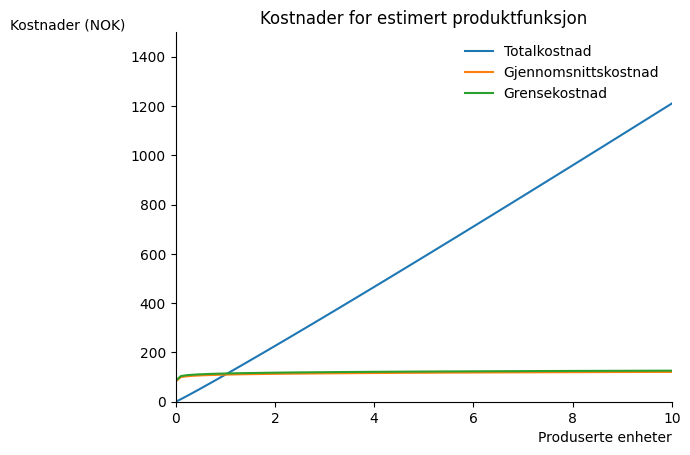

In [22]:
from matplotlib import pyplot as plt
X=np.linspace(0.001,10, 100)

fig3, ax = plt.subplots()
ax.set_ylabel('Kostnader (NOK)', loc='top', rotation = 0)
ax.set_xlabel('Produserte enheter', loc='right')
ax.set(xlim=(0,10))
ax.set(ylim=(0,1500))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
                

# plott funksjonen her

ax.plot(X,
        C(350,500,X,Z_num,res.params['n'],res.params['k'])
        ,label='Totalkostnad')
ax.plot(X,
        avgC(350,500,X,Z_num,res.params['n'],res.params['k'])
        ,label='Gjennomsnittskostnad')
ax.plot(X,
        dC(350,500,X,Z_num,res.params['n'],res.params['k'])
        ,label='Grensekostnad')


# tittel
ax.set_title('Kostnader for estimert produktfunksjon')

#vis navnene:
ax.legend(loc='best',frameon=False);


Vi kan tydelig se at totalkostnaden er linær, men de andre kostnadene er konstant, dette betyr at grafen har et konstant skalautbytte. Som betyr at hvis du dobler innsatsfaktoren, så dobler du produskjonen. Jeg ville sagt at det er ganske gode skalamuligheter her.

Denne analysen har mange svakheter, i Cobb Douglas funksjonen funker alt på en veldig linær of spesfikk måte. Uten å ta hensyn til endogene variabler utenfor funksjonen som kan påvirke produskjonen. Samtidig er det veldig begrenset hvor mye jeg kan estimere med dataen jeg har blitt gitt, funksjonen viser et konstant skalautbytte, noe som jeg tviler veldig sterkt på kommer til å spille seg ut i realiteten. 